In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
data = pd.read_csv('homework3_input_data.csv')

In [67]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [68]:
df = pd.DataFrame(X)
df['Cement Strength'] = Y
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,Cement Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


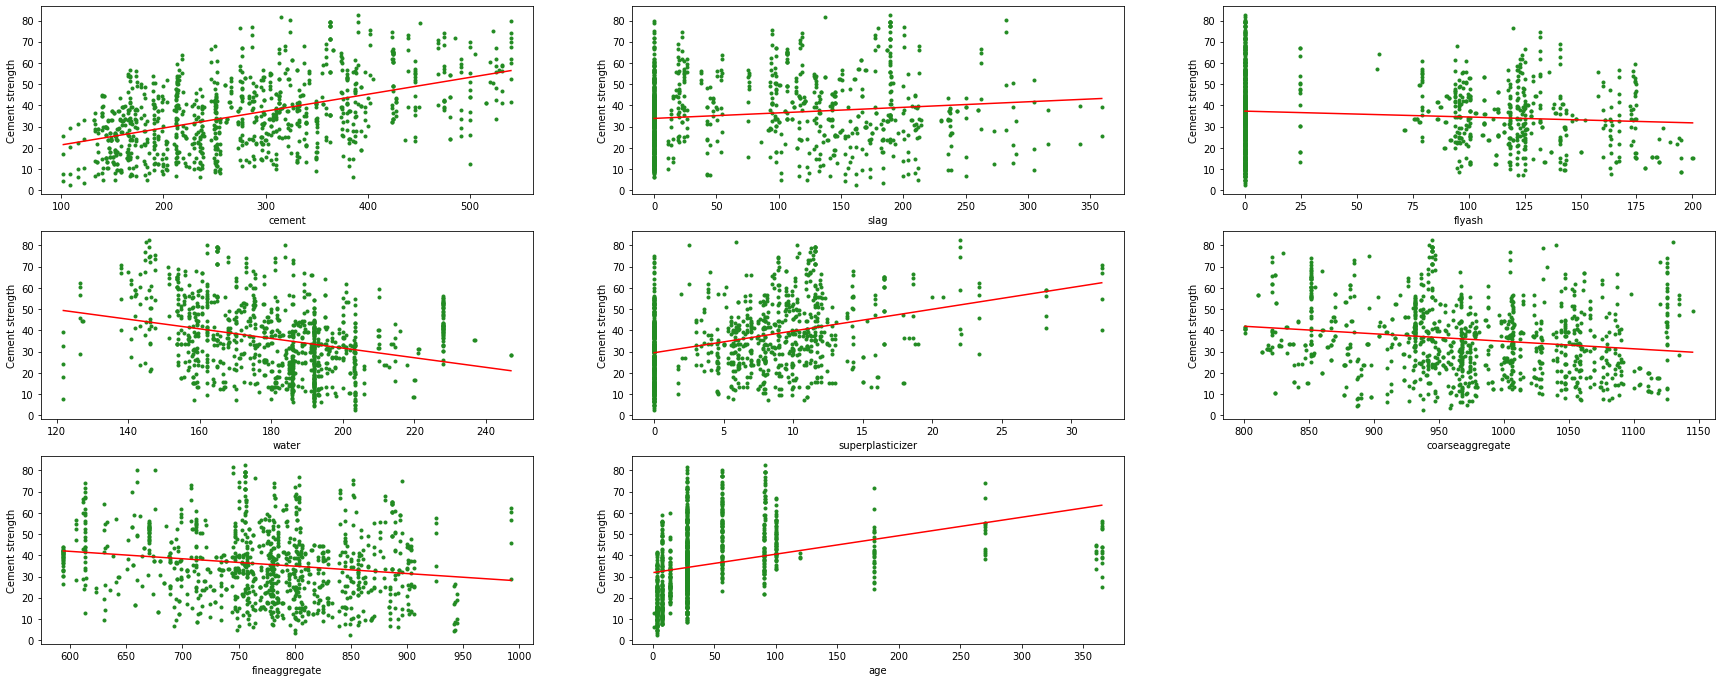

In [45]:
# Plot each indep var vs dep var to understand relationship
plt.figure(figsize=(30, 20))
for i, col in enumerate(df.columns[0:8]):
    plt.subplot(5, 3, i+1)
    x = df[col]
    y = df['Cement Strength']
    plt.plot(x, y, '.', color='forestgreen')
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
    plt.xlabel(col)
    plt.ylabel('Cement strength')

<AxesSubplot:>

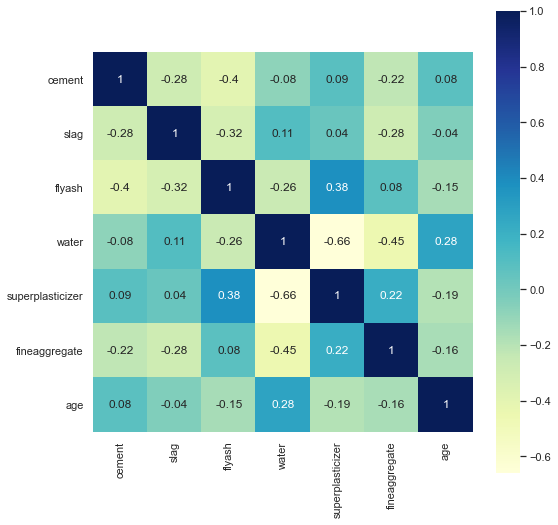

In [53]:
# Plot correlation matrix between independent variables
features = df[['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'fineaggregate', 'age']]
sns.set(rc={'figure.figsize': (8.5, 8.5)})
sns.heatmap(features.corr().round(2), square=True, cmap='YlGnBu', annot=True)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [61]:
model = linear_model.LinearRegression().fit(x_train, y_train)

In [66]:
y_test_pred = model.predict(x_test)

# Mean squared error
print('Mean Squared Error : ' + str(mean_squared_error(y_test, y_test_pred)))
print('Coefficient of Determination : ' + str(r2_score(y_test, y_test_pred)))
      

Mean Squared Error : 8.177969742262363e-28
Coefficient of Determination : 1.0
